# Exploratory data analysis of the FordGo Bike dataset

In this jupyter notebook, the Ford GoBike System Data is studied. This part of the project is mainly concerned by the basic exploration of the dataset

In [79]:
# external imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


### Data loading

In [80]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

### What kind of information one can find in the following dataset?

In [81]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [82]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [83]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Do we have many missing values in the dataset?

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

<b>Comment:</b> This first visual and programmatical analysys allows to see that we can find here the information about users and their usage of the bike system.
    

In [85]:
# counting missing values
df.shape[0] - df.dropna().shape[0]

8460

In [86]:
# counting missing values in percentage
(df.shape[0] - df.dropna().shape[0])/df.shape[0]*100

4.612566244302445

Only 4.6% of values are missing. We are going to remove rows with missing values.

In [87]:
df_copy = df.copy()

In [88]:
# removing rows with missing values
df_copy.dropna(inplace=True)

In [89]:
df_copy.shape

(174952, 16)

In [90]:
df_copy.drop_duplicates(inplace=True)

In [91]:
df_copy.shape

(174952, 16)

In [92]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


### Do we have appropriate datatype for each column of our dataset?

In [93]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

<b>Comment:</b> The datatypes of following columns should be modified:
<ul>
 <li><i>start_time</i> should be changed to the datetime</li>
 <li><i>end_time</i> should be changed to the datetime</li>
 <li><i>start_station_id</i> is changed to the integer datatype</li>
 <li><i>user_type</i> is changed to the category datatype</li>
 <li><i>member_birth_year</i> is changed to the integer datatype</li>
  <li><i>member_gender</i> is changed to the category datatype</li>
  <li><i>bike_share_for_all_trip</i> is changed to the category datatype</li> 
</ul>

In [94]:
# start_time should be changed to the datetime
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])

In [95]:
# end_time should be changed to the datetime
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

In [96]:
# start_station_id is changed to the integer datatype
df_copy['start_station_id'] = df_copy['start_station_id'].astype('int64')

In [97]:
# user_type is changed to the category datatype
df_copy['user_type'] = df_copy['user_type'].astype('category')

In [98]:
# member_birth_year is changed to the integer datatype and to the age
df_copy['member_birth_year'] = df_copy['member_birth_year'].astype('int64')

In [99]:
# member_gender is changed to the category datatype
df_copy['member_gender'] = df_copy['member_gender'].astype('category')

In [100]:
# member_gender is changed to the category datatype
df_copy['bike_share_for_all_trip'] = df_copy['bike_share_for_all_trip'].astype('category')

<b>Test</b>

In [101]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Can we do some data engineering of the following dataset and extract some additional useful data?

<b>Comment:</b> The following information can be obtained by combining information from the initial dataset:
<ul>
    <li>The <i>start_time</i> and <i>end_time</i>  columns can be used to get the duration of the bike trip.  Normally it should similar value as the column <i>duration_sec</i>. The analysys of the duration time in second is not very revealing. Thus, we change it to minutes.</li>
    <li><i>member_birth_year</i> can be used to get the age of each user</li>
    <li>Columns:<i>start_station_latitude</i>, <i>start_station_longitude</i>, <i>end_station_latitude  </i> and <i>end_station_longitude </i>  can be used to obtain the distance of between starting station and the ending station.</li>
</ul>

In [102]:
df_copy.duration_sec.head(3)

0    52185
2    61854
3    36490
Name: duration_sec, dtype: int64

In [103]:
# The start_time and end_time columns can be used to get the duration of the bike trip. Normally it should similar value as the column duration_sec.
((df_copy.end_time - df_copy.start_time) // pd.Timedelta('1s')).head(3)

0    52185
2    61854
3    36490
dtype: int64

<b>Comment:</b> The <i>duration_sec</i> column corresponds to the deltatime obtained by the difference between the <i>start_time</i> and <i>end_time</i>  columns. Thus, there is no need to create an extra column.

In [118]:
df_copy["duration_min"] = df_copy.duration_sec/60

In [119]:
df_copy = df_copy.drop(["duration_sec"],axis = 1)

In [120]:
df_copy.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_between_stations,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,37,Male,No,0.54,869.750000
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,49,Male,No,2.70,1030.900000
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,32,Other,No,0.26,608.166667
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,47,Male,Yes,2.41,26.416667
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,62,Male,No,3.33,29.883333


In [104]:
# member_birth_year can be used to get the age of each user
df_copy["member_birth_year"] = pd.Timestamp.today().year - df_copy.member_birth_year

In [105]:
df_copy["member_birth_year"].head(3)

0    37
2    49
3    32
Name: member_birth_year, dtype: int64

<b>Comment:</b> In order two get the distance in km between the starting station and the ending station, we are going to use the formula for the distance from the towardsdatascience.com article that one may find here:
https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4

The function <i>get_haversine_distance</i> found in this article allows to compute the distance between two locations.

In [114]:
def get_haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

Columns:start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude can be used to obtain the distance of between starting station and the ending station.

In [115]:
lat1 = df_copy.start_station_latitude
lon1 = df_copy. start_station_longitude
lat2 = df_copy.end_station_latitude
lon2 = df_copy.end_station_longitude
df_copy["distance_between_stations"] = get_haversine_distance(lat1, lon1, lat2, lon2)

In [116]:
df_copy["distance_between_stations"].head()

0    0.54
2    2.70
3    0.26
4    2.41
5    3.33
Name: distance_between_stations, dtype: float64

<b>Comment:</b> Values obtained in this column seem to be reasonable for bike trips.

In [121]:
df_copy.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'distance_between_stations', 'duration_min'],
      dtype='object')

### Univariate Exploration

<AxesSubplot:xlabel='duration_min', ylabel='Count'>

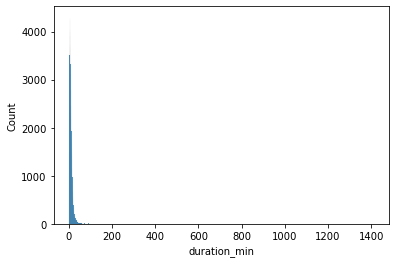

In [122]:
# exploring the duration time in minutes
sns.histplot(data=df_copy, x="duration_min")